In [226]:
#importing relevant packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [227]:
#Reading the the csv file 
df = pd.read_csv("C:\\Users\\Naledi_M\\Desktop\\water.csv", sep = "comma", engine = "python")

In [228]:
# viewing the first 10 rows of the data
df.head(10)

,"Data Source,World Development Indicators,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,"Last Updated Date,5/30/2024,,,,,,,,,,,,,,,,,,,..."
2,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
3,"Country Name,Country Code,Indicator Name,Indic..."
4,"Aruba,ABW,People using at least basic drinking..."
5,"Africa Eastern and Southern,AFE,People using a..."
6,"Afghanistan,AFG,People using at least basic dr..."
7,"Africa Western and Central,AFW,People using at..."
8,"Angola,AGO,People using at least basic drinkin..."
9,"Albania,ALB,People using at least basic drinki..."


In [229]:
#checking the unique columns in the dataset
df.columns.unique()


Index(['Data Source,World Development Indicators,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'], dtype='object')

In [232]:
#removing quotation marks in the dataset
df = df.apply(lambda s:s.str.replace('"',''))

In [233]:
#setting the fourth row to be the columns of the dataset
df.columns = df.iloc[3]
df.columns.unique()

Index(['Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023'], dtype='object', name=3)

In [235]:
# removing the first 3 rows from the dataset 
df = df.loc[4:,:]

In [236]:
# renaming the exsisting column to a shorter name : col
df.rename(columns={'Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023': "Col"},inplace = True)

In [237]:
#Splitting col by comma
split_columns = df["Col"].str.split(",",expand =True)
#Creating names to the splitted columns 
column_names = ["Country", "Country Code", "Indicator Name", "Indicator Code"] + [str(year) for year in range(1960, 2024)] + ["Last Updated Date"]
#Assigning names to splitted columns
split_columns.columns = column_names[:len(split_columns.columns)]
#Concating split_columns and the original dataframe into a new dataframe and deleting the original col
df1 = pd.concat([df.drop(columns=['Col']), split_columns], axis=1)

In [238]:
#viewing the first 5 rows
df1.head(5)

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Last Updated Date
4,Aruba,ABW,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,,,,,,,...,97.86902338,97.86902338,,,,,,,,None
5,Africa Eastern and Southern,AFE,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,,,,,,,...,53.60298591,54.41645593,55.23389096,56.06883421,56.87769713,57.64338515,58.38445523,59.10346311,,None
6,Afghanistan,AFG,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,,,,,,,...,62.36965956,65.17216226,68.00887159,70.87994089,73.784643,76.7222554,79.69307846,82.17537112,,None
7,Africa Western and Central,AFW,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,,,,,,,...,66.54840711,67.61722605,68.68196023,69.749071,70.79848719,71.84506309,72.93549109,74.04563986,,None
8,Angola,AGO,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,,,,,,,...,54.31693061,55.08427251,55.84290952,56.59174877,56.88303749,57.16773792,57.44672553,57.71956067,,None


In [239]:
#dropping empty columns 
df1.drop(df1.iloc[:, 4:44], inplace =True, axis = 1)

In [240]:
# identifying missing values, replacing empty entires with nan 
df1["2000"] = df1["2000"].str.strip().replace('',np.nan)
df1["2001"] = df1["2001"].str.strip().replace('',np.nan)
df1["2002"] = df1["2002"].str.strip().replace('',np.nan)
df1["2003"] = df1["2003"].str.strip().replace('',np.nan)
df1["2004"] = df1["2004"].str.strip().replace('',np.nan)
df1["2005"] = df1["2005"].str.strip().replace('',np.nan)
df1["2006"] = df1["2006"].str.strip().replace('',np.nan)
df1["2007"] = df1["2007"].str.strip().replace('',np.nan)
df1["2008"] = df1["2008"].str.strip().replace('',np.nan)
df1["2009"] = df1["2009"].str.strip().replace('',np.nan)
df1["2010"] = df1["2010"].str.strip().replace('',np.nan)
df1["2011"] = df1["2011"].str.strip().replace('',np.nan)
df1["2012"] = df1["2012"].str.strip().replace('',np.nan)
df1["2013"] = df1["2013"].str.strip().replace('',np.nan)
df1["2014"] = df1["2014"].str.strip().replace('',np.nan)
df1["2015"] = df1["2015"].str.strip().replace('',np.nan)
df1["2016"] = df1["2016"].str.strip().replace('',np.nan)
df1["2017"] = df1["2017"].str.strip().replace('',np.nan)
df1["2018"] = df1["2018"].str.strip().replace('',np.nan)
df1["2019"] = df1["2019"].str.strip().replace('',np.nan)
df1["2020"] = df1["2020"].str.strip().replace('',np.nan)
df1["2021"] = df1["2021"].str.strip().replace('',np.nan)
df1["2022"] = df1["2022"].str.strip().replace('',np.nan)
df1["2023"] = df1["2023"].str.strip().replace('',np.nan)

In [241]:
# counting missing values 
missing = df1.isnull().sum()
missing

Country                0
Country Code           0
Indicator Name         0
Indicator Code         0
2000                  30
2001                  16
2002                  14
2003                  14
2004                  14
2005                   9
2006                   8
2007                   8
2008                   9
2009                   7
2010                   7
2011                   6
2012                   6
2013                   6
2014                   6
2015                   5
2016                   4
2017                   7
2018                  13
2019                  14
2020                  16
2021                  19
2022                  23
2023                 256
Last Updated Date    253
dtype: int64

In [242]:
# determining the type of data in the dataframe
df1.dtypes

Country              object
Country Code         object
Indicator Name       object
Indicator Code       object
2000                 object
2001                 object
2002                 object
2003                 object
2004                 object
2005                 object
2006                 object
2007                 object
2008                 object
2009                 object
2010                 object
2011                 object
2012                 object
2013                 object
2014                 object
2015                 object
2016                 object
2017                 object
2018                 object
2019                 object
2020                 object
2021                 object
2022                 object
2023                 object
Last Updated Date    object
dtype: object

In [243]:
df1["2000"] = df1["2000"].astype(float)

In [244]:
#converting the year columns to floats
def convert(x,cols):
    x[cols] = x[cols].astype(float)
    return x
df1 = convert(df1,["2000","2001","2002","2003","2004","2005","2006","2007","2008",
             "2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"])
        

In [245]:
# creating a function to change object dtypes to strings
def str_convert(x,cols):
    x[cols] = x[cols].astype("string")
    return x.dtypes
#str_convert(df1,["Country","Country Code"])

In [246]:
# creating a function to replace missing values with the mean of each column.
def finding_mean(x,col):
    ave = x[col].mean()
    x[col] = x[col].fillna(ave)
    return x   
            
finding_mean(df1,["2000","2001","2002","2003","2004","2005","2006","2007","2008",
             "2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"])
df1.head(3)

,Country,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Last Updated Date
4,Aruba,ABW,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,94.488806,94.770491,95.052176,95.333861,95.615545,95.897230,...,97.869023,97.869023,87.947767,88.238464,88.538096,88.849105,89.100698,89.429109,86.620058,None
5,Africa Eastern and Southern,AFE,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,41.809640,42.499933,43.207039,43.918658,44.635138,45.433853,...,53.602986,54.416456,55.233891,56.068834,56.877697,57.643385,58.384455,59.103463,86.620058,None
6,Afghanistan,AFG,People using at least basic drinking water ser...,SH.H2O.BASW.ZS,27.441856,27.473580,29.674863,31.875589,34.094431,36.331226,...,62.369660,65.172162,68.008872,70.879941,73.784643,76.722255,79.693078,82.175371,86.620058,None


In [247]:
#percentage of people with drinking water in south afria
south = df1.loc[(df1["Country"] =="South Africa")]


In [248]:
# slicing the dataframe to only show data from the year 2000 to 2023
pop = south.iloc[:,4:]
pop.iloc[:,8:]

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Last Updated Date
267,88.669259,89.142858,89.607555,90.063165,90.509974,90.947383,91.376143,91.796096,92.207312,92.609683,93.003291,93.388244,93.76479,94.1327,94.492089,86.620058,None


In [249]:
#creating a dataframe for population and year using the above sliced data
population = pd.DataFrame({"year":["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
                                  "2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"],
                          "num":[84.57746,85.101003,85.633102,86.162149,86.682251,87.192579,87.69378,88.185908,88.669259,89.142858,
                                          89.607555, 90.063165,90.509974,90.947383,91.376143,91.796096,92.207312,92.609683,93.003291,93.388244,
                                          93.76479,94.1327,94.492089,86.620058]})

Text(0, 0.5, 'Population with access to drinking water')

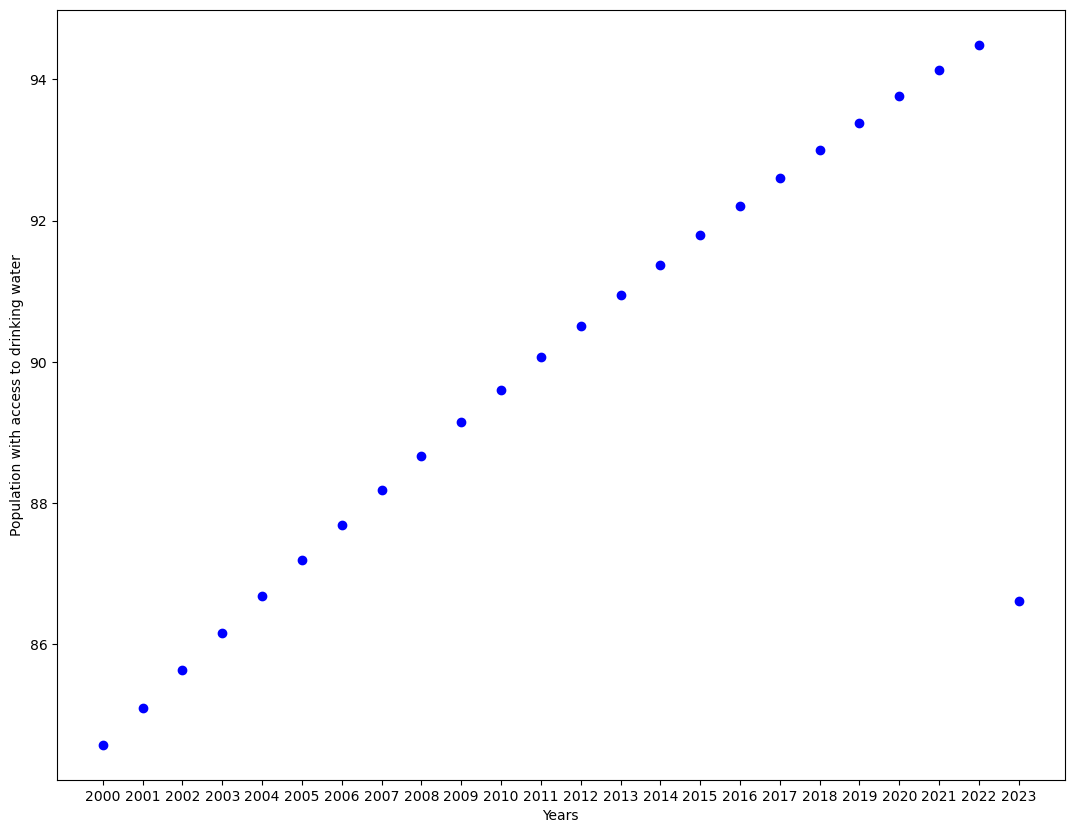

In [250]:
# plotting a scatter plot to visualise the data
x = population["year"]
y = population["num"]
fig = plt.figure(figsize = (13,10))
plt.scatter(x,y,color = 'b')
plt.xlabel('Years')
plt.ylabel('Population with access to drinking water')

In [216]:
#reshaping the x variable
shape = np.array(x)
reshaped = x_.reshape(-1,1)

In [251]:
# applying the linear regression model
from sklearn.linear_model import LinearRegression
%matplotlib inline
population_model = LinearRegression()
population_model.fit(reshaped,y)
y_pred = population_model.predict(reshaped) # applying the prediction model


In [252]:
#finding the unique values in the x variable i.e "reshaped"
arr1 = np.array(reshaped)
unique_arr1 = np.unique(arr1) 

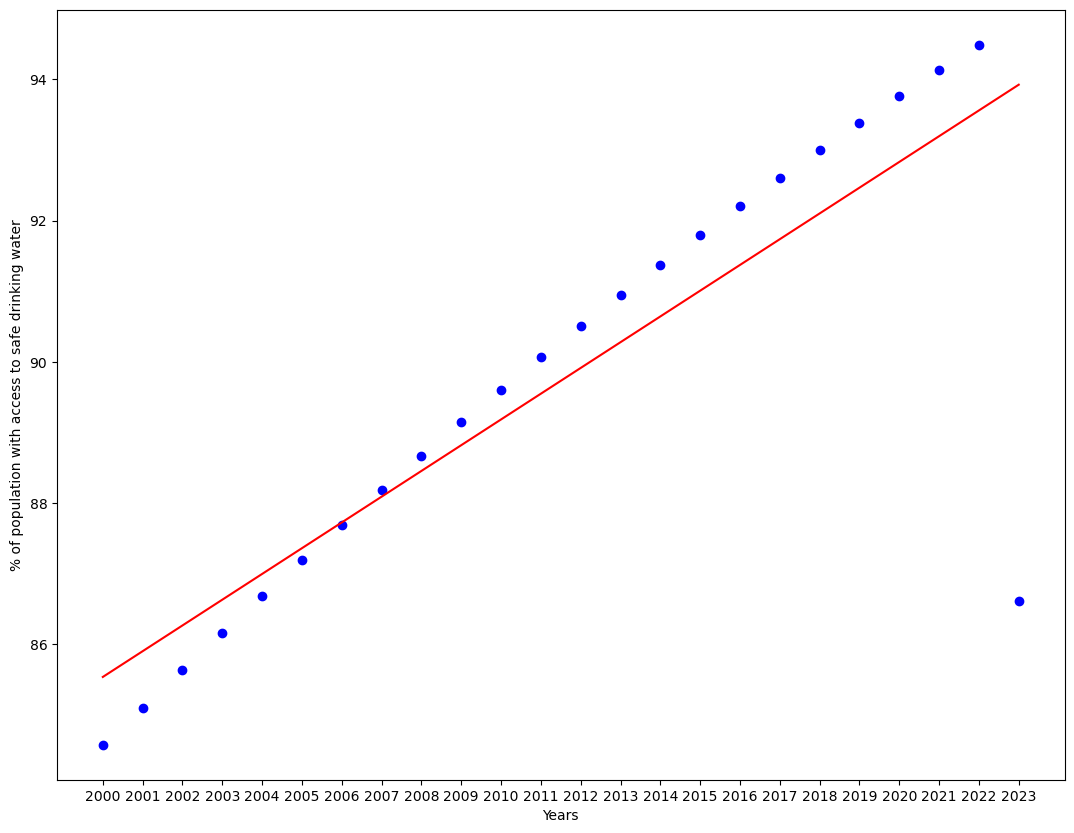

In [253]:
#plotting a scatter plot with the prediction line
fig = plt.figure(figsize = (13,10))
plt.scatter(unique_arr1,y,color = 'b')
plt.plot(unique_arr1,y_pred,color = 'r')
plt.xlabel('Years')
plt.ylabel('% of population with access to safe drinking water')
plt.show()

In [261]:
# predicting percentage of water availability in 2024
pred_2025 = [[2025]]
pred_2026 = [[2026]]
pred_2027 = [[2027]]
pred_2028 = [[2028]]
pred_2029 = [[2029]]
print(f"The percentage of people who will have access to safe drinking water in 2025 is {population_model.predict(pred_2025)}")
print(f"The percentage of people who will have access to safe drinking water in 2026 is {population_model.predict(pred_2026)}")
print(f"The percentage of people who will have access to safe drinking water in 2027 is {population_model.predict(pred_2027)}")
print(f"The percentage of people who will have access to safe drinking water in 2028 is {population_model.predict(pred_2028)}")
print(f"The percentage of people who will have access to safe drinking water in 2029 is {population_model.predict(pred_2029)}")

The percentage of people who will have access to safe drinking water in 2025 is [94.65528585]
The percentage of people who will have access to safe drinking water in 2026 is [95.02000199]
The percentage of people who will have access to safe drinking water in 2027 is [95.38471813]
The percentage of people who will have access to safe drinking water in 2028 is [95.74943427]
The percentage of people who will have access to safe drinking water in 2029 is [96.1141504]
